# Analysis of Basketball Player Gameplay Statistics

### Rohan Malhotra, Matthew Silverman, Gidon Eydelnant
### Data Bootcamp, December 2018

##### Note: We are setting up an input box where the user will enter the assumptions based on criteria in the section below. If the user does not want to enter values of their own, they can hit enter five times and our default values will be entered instead. We are taking default values of 5000 ,300, 1000, 1000, 2500 for minutes, games played, threeAttempted (three point shots attempted), ftAttempted (free throws attempted), fgAttempted (field goals attempted). We feel this will best eliminate the noise based on the stats listed below. In order to run the code, the user needs to either enter the assumptions or leave the inputs blank and hit "enter" five times or else the code will hang.

### Outline
This project analyzes data gathered over the past half century and looks specifically at individual basketball player statistics to identify which have the most well-rounded playing styles for their positions, as well as the relationship of their draft picks to the success of their games. The data is limited to exclude earlier than 1976 in order to use the period after the National Basketball Association (NBA) and American Basketball Association (ABA) merged, resulting in a more focused data pool. First, the project builds a function to identify the most well-rounded player based on their playing statistics overall, regardless of position. It then plots all players draft picks against their total career points scored, and then builds on the initial function to identify best players by position through evaluating metrics that are most relevant to each position. Finally, the project plots free throw rankings agains three point rankings to indentify a relationship between players' ability to score points both during play and during three point shots. The player data for this project was pulled from a dataset on Kaggle titled "Men's Professional Basketball" sourced here: https://www.kaggle.com/open-source-sports/mens-professional-basketball.

### Importing Packages

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt 
import sys
import statsmodels.formula.api as smf

### Section 1: Identifying the "most effecient basketball player"

In [48]:
url_1=r'https://raw.githubusercontent.com/mbsilverman10/FinalProject/master/basketball_draft.csv'
url_2=r'https://raw.githubusercontent.com/mbsilverman10/FinalProject/master/basketball_hof.csv'
url_3=r'https://raw.githubusercontent.com/mbsilverman10/FinalProject/master/basketball_players.csv'
url_4=r'https://raw.githubusercontent.com/mbsilverman10/FinalProject/master/basketball_master.csv'

In [49]:
players=pd.read_csv(url_3) 
master=pd.read_csv(url_4)
players=players[players.year>=1976] ## Filtering out player date before 1976
players.head(1)

C:\Users\Gidon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
6263,abdulka01,1976,1,LAL,NBA,82,0,3016,2152,266,...,38,0,42,242,147,120,87,0,0,NaN


#### The players file has all the statistics but not the name of the players.  It has a player ID.  The master file has the player ID along with the names.  That is why need to merge the two files.  In addition, we are adding player ID to the full name as there are multiple players with the same first and last names.  The player ID's are obviusly unique.

In [50]:
pm=players.merge(master, left_on='playerID',right_on= 'bioID', how='left' )
pm['Full_Name'] = pm['firstName'] + ' ' + pm['lastName'] + ' ' + '[' + pm['playerID'] + ']'
print(players.shape,master.shape, pm.shape)

(15552, 42) (5061, 26) (15552, 69)


Here, we created a new DataFrame with select columns and aggregated the data for the years specified. This is because statistics are listed for individual years and have multiple entries for the same player that plays for multiple years. Therefore, we can run our metrics after aggregating the data.

In [51]:
Reg_season=pm[['Full_Name','GP','minutes','points','rebounds','assists','steals','blocks','turnovers','PF','fgAttempted',
         'fgMade','ftAttempted','ftMade','threeAttempted','threeMade']]
New_DF=Reg_season.groupby('Full_Name', as_index=False).aggregate(sum)
New_DF.head(1)

,Full_Name,GP,minutes,points,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,A. Beck [beckby01],53,480,250,96,33,15,1,0,59,246,107,44,36,0,0


We are now adding nine performance criteria to the previous DataFrame, on which we will run our metrics. These are points effeciency, rebounds effeciency, assists effeciency, steals effeciency, blocks effeciency, turnovers effeciency, field goal percentage, free throw percenatge, and three point percentage.

In [52]:
New_DF['Points_Eff']=New_DF['points']/New_DF['minutes']
New_DF['Rebounds_Eff']=New_DF['rebounds']/New_DF['minutes']
New_DF['Assists_Eff']=New_DF['assists']/New_DF['minutes']
New_DF['Steals_Eff']=New_DF['steals']/New_DF['minutes']
New_DF['Blocks_Eff']=New_DF['blocks']/New_DF['minutes']
New_DF['Turnovers_Eff']=New_DF['turnovers']/New_DF['minutes']
New_DF['FG_PCT']=New_DF['fgMade']/New_DF['fgAttempted']
New_DF['FT_PCT']=New_DF['ftMade']/New_DF['ftAttempted']
New_DF['Three_PCT']=New_DF['threeMade']/New_DF['threeAttempted']
New_DF.head(1)

,Full_Name,GP,minutes,points,rebounds,assists,steals,blocks,turnovers,PF,...,threeMade,Points_Eff,Rebounds_Eff,Assists_Eff,Steals_Eff,Blocks_Eff,Turnovers_Eff,FG_PCT,FT_PCT,Three_PCT
0,A. Beck [beckby01],53,480,250,96,33,15,1,0,59,...,0,0.520833,0.2,0.06875,0.03125,0.002083,0.0,0.434959,0.818182,NaN


Here we collect stats for various criteria to determine the sample size. For example, there are some players who have only attempted and made 2 out of 2 three point shots. They are not three point shooters normally but they could have played a large number of games and minutes. Therefore, these need to be excluded from the sample size to reduce the noise. This section also allows the user to input their own assumptions. We are setting up an input box where the user will enter the assumptions based on criteria in the section below. If the user does not want to enter values of their own, they can hit enter five times and our default values will be entered instead. We are taking default values of 5000 ,300, 1000, 1000, 2500 for minutes, games played, threeAttempted (three point shots attempted), ftAttempted (free throws attempted), fgAttempted (field goals attempted). We feel this will best eliminate the noise based on the stats listed below.

In [53]:
New_DF[['minutes','GP','threeAttempted','ftAttempted','fgAttempted']].describe()

,minutes,GP,threeAttempted,ftAttempted,fgAttempted
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,7105.547012,297.913970,312.593453,784.359726,2477.194518
std,9332.491990,313.757238,727.684694,1274.503318,3623.689774
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,406.000000,44.000000,1.000000,35.000000,121.000000
50%,2579.000000,164.000000,17.000000,229.000000,766.000000
75%,10843.000000,495.000000,193.500000,1012.000000,3410.500000
max,54852.000000,1611.000000,6788.000000,13188.000000,26210.000000


In [54]:
Minimum_Minutes=input('Please enter Minutes:')
Minimum_Games=input('Please enter Games:')
Minimum_threeAttempted=input('Please enter threeAttempted:')
Minimum_ftAttempted=input('Please enter ftAttempted:')
Minimum_fgAttempted=input('Please enter fgAttempted:')

Please enter Minutes:
Please enter Games:
Please enter threeAttempted:
Please enter ftAttempted:
Please enter fgAttempted:


In [55]:
if Minimum_Minutes=='':
    Minimum_Minutes=5000
if Minimum_Games== '':
    Minimum_Games=300
if Minimum_threeAttempted=='':
    Minimum_threeAttempted=1000
if Minimum_ftAttempted=='':
    Minimum_ftAttempted=1000
if Minimum_fgAttempted=='':
    Minimum_fgAttempted=2500
print(Minimum_Minutes,Minimum_Games,Minimum_threeAttempted,Minimum_ftAttempted,Minimum_fgAttempted, sep= '  /  ')

5000  /  300  /  1000  /  1000  /  2500


In [56]:
## Change string entries to integers
Minimum_Minutes=int(Minimum_Minutes)
Minimum_Games=int(Minimum_Games)
Minimum_ftAttempted=int(Minimum_ftAttempted)
Minimum_fgAttempted=int(Minimum_fgAttempted)
Minimum_threeAttempted=int(Minimum_threeAttempted)

## Create new DataFrame based on criteria specified
New_DF=New_DF[New_DF.minutes>=Minimum_Minutes]
New_DF=New_DF[New_DF.GP>=Minimum_Games]
New_DF=New_DF[New_DF.ftAttempted>=Minimum_ftAttempted]
New_DF=New_DF[New_DF.fgAttempted>=Minimum_fgAttempted]
New_DF=New_DF[New_DF.threeAttempted>=Minimum_threeAttempted]
New_DF.shape

(209, 25)

In [57]:
New_DF=New_DF.set_index('Full_Name')
New_DF.shape

(209, 24)

This section aggregates the performace criteria to see who is most effecient. We deduct the Turnover Efficiency because in this case a lower value is better.

In [58]:
New_DF['Overall_Score']=(New_DF['Points_Eff']+ New_DF['Rebounds_Eff'] + New_DF['Assists_Eff'] +
                         New_DF['Steals_Eff'] + New_DF['Blocks_Eff'] -New_DF['Turnovers_Eff'] +
                         New_DF['FG_PCT'] + New_DF['FT_PCT']  + New_DF['Three_PCT'] )
New_DF.head(1)

,GP,minutes,points,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,...,Points_Eff,Rebounds_Eff,Assists_Eff,Steals_Eff,Blocks_Eff,Turnovers_Eff,FG_PCT,FT_PCT,Three_PCT,Overall_Score
Full_Name,,,,,,,,,,,,,,,,,,,,,
Aaron Crawford [crawfja01],812,25816,12409,2080,3153,796,185,1662,1311,10608,...,0.480671,0.08057,0.122134,0.030834,0.007166,0.064379,0.408371,0.852186,0.347706,2.265259


Here, we are taking the top 15 players by overall score. We also sort the list alphabetically so it is easier for the reader to see. In our graph we want to highlight the player with the highest score and we want it to be dynamic.  Therefore, we are setting that variable to be 'y' by doing a filter for max score and then slicing from the index value. We use this technique number of times below as well.

In [59]:
Best_Player=New_DF[['Overall_Score']]
Best_Player=Best_Player.sort_values('Overall_Score', ascending= False)
Best_Player=Best_Player.head(15)
Best_Player=Best_Player.sort_index(ascending=True)
y=Best_Player[Best_Player['Overall_Score']== Best_Player['Overall_Score'].max()].index[0]
y

'Larry Bird [birdla01]'

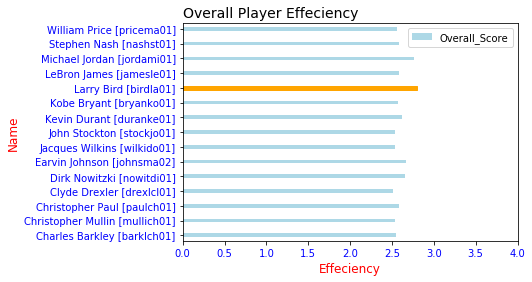

In [60]:
fig, ax = plt.subplots()
Best_Player.plot(ax=ax, kind='barh',figsize=(6,4), width=.25, color='lightblue')
ax.set_title('Overall Player Effeciency', fontsize=14, loc='left')
ax.set_ylabel('Name',color='red',fontsize=12)
ax.set_xlabel('Effeciency',color='red',fontsize=12)
ax.set_xlim(0,4)                 
ax.tick_params(axis='x',labelcolor='blue')
ax.tick_params(axis='y',labelcolor='blue')
ax.legend(loc='best')
ax.get_children()[list(Best_Player.index).index(y)].set_color('orange')

### Section 2: Relationship between Draft Position and Points Scored

We are using the DataFrame 'pm' created in the section above. Since there are multiple entries for years, we need to aggregate by 'playerID' as that is the only unique value for each player (there are examples of different players with the exact same first and last name).

In [61]:
draft=pd.read_csv(url_1)
Scatter_DF=pm[['playerID','points']]
Total_Points=Scatter_DF.groupby('playerID', as_index=False)['points'].aggregate(sum)
Total_Points.sort_values('points', ascending=False).head(1)

,playerID,points
1463,malonka01,36928


In [62]:
## We are now merging the 'Total_Points' DataFrame with the 'draft' DataFrame so we can create a scatter plot
New_DF_Scatter=Total_Points.merge(draft, left_on='playerID',right_on= 'playerID', how='inner' )
New_DF_Scatter.head(1)

,playerID,points,draftYear,draftRound,draftSelection,draftOverall,tmID,firstName,lastName,suffixName,draftFrom,lgID
0,abdelal01,1465,1990,1,25,25,POR,Alaa,Abdelnaby,NaN,Duke,NBA


We are importing the Seaborn package to give us scatter and trend lines. We are trying to find a relationship between points scored and overall draft position. We see a negative trend becuase better players (picked early in draft) should score more points. We also calculated the correlation below the chart to validate our results. The correlation is indeed negative but not to the degree that we had expected. This could be because points scored are only one of several criteria signaling high performance. We could do an analysis of draft picks and overall player effeciency but are limited due to the length constraints of the project.

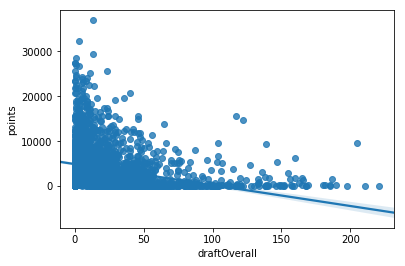

In [63]:
import seaborn as sns
sns.regplot(x='draftOverall', y='points' ,data=New_DF_Scatter)

In [64]:
New_DF_Scatter[['points','draftOverall']].corr()

,points,draftOverall
points,1.00000,-0.29248
draftOverall,-0.29248,1.00000


### Section 3: Evaluating each player by respective position

In section 1, we considered all performance metrics for all players. While this was a worthwhile exercise, one could argue that for some positions, certain criteria do not apply. For example, centers are usually the tallest players and don't handle the ball too much nor do they take three pointers. Therefore, for centers and forwards, we will be excluding the three point, turnover, and steals performace criteria. This would give a better indication of the best player is for that particular position. First, we are taking out any entries for which a position is not listed. Also, there are some players that played multiple positions. Therefore, it becomes difficult to figure out how to break this down. We are assuming that the first letter corresponds to the position for which the player is better suited. For example, F-C, implies that the player's primary speciality is that of a forward, but he also can play center. Similarly, G-F-C implies that the player's best skills lie at guard, followed by forward and center. Of course, this is a subjective assessment, and there are people who may have different opinions on how to break this down. We felt that this gives the best breakdown to analyze the performance metrics. 

In [65]:
master_1=master.loc[master['pos'].notnull(),:]
master_1['pos'].value_counts()

G        1625
F        1354
C         501
F-C       444
G-F       427
F-G       254
C-F       251
F-C-G      11
F-G-C       7
C-G         2
 G          1
C-F-G       1
G-F-C       1
Name: pos, dtype: int64

In [66]:
# Taking the first letter of every position and creating a new column with respective positions
master_1['new_pos']=master_1['pos'].astype(str).str[0]
pm=players.merge(master_1, left_on='playerID', right_on='bioID', how='inner') # Merging the DataFrames
pm['Full_Name'] = pm['firstName'] + ' ' + pm['lastName'] + ' ' + '[' + pm['playerID'] + ']' # Creating a new column "Full_Name"

C:\Users\Gidon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Next, we will create DataFrames by position (Centers / Forwards / Guards). We will do this by filtering for the respective positions. Then, we aggregate the data and create performance criteria. For centers, we are not considering a minimum number of three point shots attempted as this will greatly limit the sample size. This is because the centers usually dont attempt many three point shots. As mentioned above, we are not considering three pointers, turnovers, and steals effeciency criteria for the centers and forwards. We will consider all performance criteria for guards because they are well rounded.

In [67]:
Pos_DF=pm[['Full_Name','new_pos','GP','minutes','points','rebounds','assists','steals','blocks','turnovers','PF','fgAttempted',
         'fgMade','ftAttempted','ftMade','threeAttempted','threeMade']]
print(Pos_DF['new_pos'].value_counts())

Center=Pos_DF[Pos_DF['new_pos'] == 'C']
Forward=Pos_DF[Pos_DF['new_pos'] == 'F']
Guard=Pos_DF[Pos_DF['new_pos'] == 'G']

F    6510
G    6436
C    2595
Name: new_pos, dtype: int64


In [68]:
Center=Center.groupby('Full_Name', as_index=False).aggregate(sum)

Center['Points_Eff']=Center['points']/Center['minutes']
Center['Rebounds_Eff']=Center['rebounds']/Center['minutes']
Center['Assists_Eff']=Center['assists']/Center['minutes']
Center['Steals_Eff']=Center['steals']/Center['minutes']
Center['Blocks_Eff']=Center['blocks']/Center['minutes']
Center['Turnovers_Eff']=Center['turnovers']/Center['minutes']
Center['FG_PCT']=Center['fgMade']/Center['fgAttempted']
Center['FT_PCT']=Center['ftMade']/Center['ftAttempted']
Center['Three_PCT']=Center['threeMade']/Center['threeAttempted']

In [69]:
Forward=Forward.groupby('Full_Name', as_index=False).aggregate(sum)

Forward['Points_Eff']=Forward['points']/Forward['minutes']
Forward['Rebounds_Eff']=Forward['rebounds']/Forward['minutes']
Forward['Assists_Eff']=Forward['assists']/Forward['minutes']
Forward['Steals_Eff']=Forward['steals']/Forward['minutes']
Forward['Blocks_Eff']=Forward['blocks']/Forward['minutes']
Forward['Turnovers_Eff']=Forward['turnovers']/Forward['minutes']
Forward['FG_PCT']=Forward['fgMade']/Forward['fgAttempted']
Forward['FT_PCT']=Forward['ftMade']/Forward['ftAttempted']
Forward['Three_PCT']=Forward['threeMade']/Forward['threeAttempted']

In [70]:
Guard=Guard.groupby('Full_Name', as_index=False).aggregate(sum)

Guard['Points_Eff']=Guard['points']/Guard['minutes']
Guard['Rebounds_Eff']=Guard['rebounds']/Guard['minutes']
Guard['Assists_Eff']=Guard['assists']/Guard['minutes']
Guard['Steals_Eff']=Guard['steals']/Guard['minutes']
Guard['Blocks_Eff']=Guard['blocks']/Guard['minutes']
Guard['Turnovers_Eff']=Guard['turnovers']/Guard['minutes']
Guard['FG_PCT']=Guard['fgMade']/Guard['fgAttempted']
Guard['FT_PCT']=Guard['ftMade']/Guard['ftAttempted']
Guard['Three_PCT']=Guard['threeMade']/Guard['threeAttempted']

In [71]:
Center_1=Center[Center.minutes>=Minimum_Minutes]
Center_1=Center[Center.GP>=Minimum_Games]
Center_1=Center[Center.ftAttempted>=Minimum_ftAttempted]
Center_1=Center[Center.fgAttempted>=Minimum_fgAttempted]
Center_1=Center_1.set_index('Full_Name')

Forward_1=Forward[Forward.minutes>=Minimum_Minutes]
Forward_1=Forward[Forward.GP>=Minimum_Games]
Forward_1=Forward[Forward.ftAttempted>=Minimum_ftAttempted]
Forward_1=Forward[Forward.fgAttempted>=Minimum_fgAttempted]
Forward_1=Forward_1.set_index('Full_Name')

Guard_1=Guard[Guard.minutes>=Minimum_Minutes]
Guard_1=Guard[Guard.GP>=Minimum_Games]
Guard_1=Guard[Guard.ftAttempted>=Minimum_ftAttempted]
Guard_1=Guard[Guard.fgAttempted>=Minimum_fgAttempted]
Guard_1=Guard[Guard.threeAttempted>=Minimum_threeAttempted]
Guard_1=Guard_1.set_index('Full_Name')

In [72]:
Center_1['Overall_Score']=(Center_1['Points_Eff']+ Center_1['Rebounds_Eff'] + Center_1['Assists_Eff'] +
                           Center_1['Blocks_Eff']  + Center_1['FG_PCT'] + Center_1['FT_PCT'] )

Forward_1['Overall_Score']=(Forward_1['Points_Eff']+ Forward_1['Rebounds_Eff'] + Forward_1['Assists_Eff'] +
                           Forward_1['Blocks_Eff']  + Forward_1['FG_PCT'] + Forward_1['FT_PCT'] )

Guard_1['Overall_Score']=(Guard_1['Points_Eff']+ Guard_1['Rebounds_Eff'] + Guard_1['Assists_Eff'] +
                         Guard_1['Steals_Eff'] + Guard_1['Blocks_Eff'] - Guard_1['Turnovers_Eff'] +
                        Guard_1['FG_PCT'] + Guard_1['FT_PCT']  + Guard_1['Three_PCT'] )

Best_Center=Center_1[['Overall_Score']]
Best_Center=Best_Center.sort_values('Overall_Score', ascending= False)
Best_Center=Best_Center.head(15)
Best_Center=Best_Center.sort_index(ascending=True)

Best_Forward=Forward_1[['Overall_Score']]
Best_Forward=Best_Forward.sort_values('Overall_Score', ascending= False)
Best_Forward=Best_Forward.head(15)
Best_Forward=Best_Forward.sort_index(ascending=True)

Best_Guard=Guard_1[['Overall_Score']]
Best_Guard=Best_Guard.sort_values('Overall_Score', ascending= False)
Best_Guard=Best_Guard.head(15)
Best_Guard=Best_Guard.sort_index(ascending=True)

c=Best_Center[Best_Center['Overall_Score']== Best_Center['Overall_Score'].max()].index[0]
f=Best_Forward[Best_Forward['Overall_Score']== Best_Forward['Overall_Score'].max()].index[0]
g=Best_Guard[Best_Guard['Overall_Score']== Best_Guard['Overall_Score'].max()].index[0]

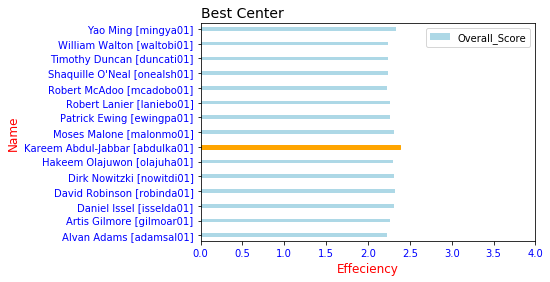

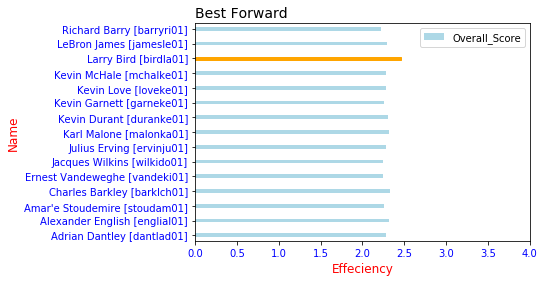

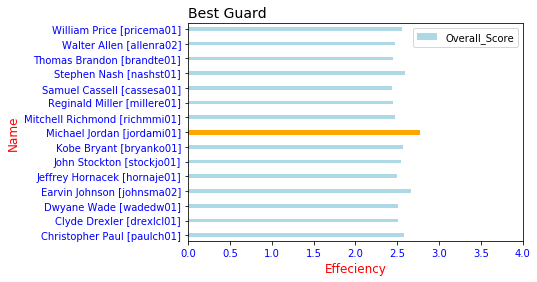

In [73]:
fig, ax = plt.subplots()
Best_Center.plot(ax=ax, kind='barh',figsize=(6,4), width=.25, color='lightblue')
ax.set_title('Best Center', fontsize=14, loc='left')
ax.set_ylabel('Name',color='red',fontsize=12)
ax.set_xlabel('Effeciency',color='red',fontsize=12)
ax.set_xlim(0,4)                
ax.tick_params(axis='x',labelcolor='blue')
ax.tick_params(axis='y',labelcolor='blue')
ax.legend(loc='best')
ax.get_children()[list(Best_Center.index).index(c)].set_color('orange')

fig, ax = plt.subplots()
Best_Forward.plot(ax=ax, kind='barh',figsize=(6,4), width=.25, color='lightblue')
ax.set_title('Best Forward', fontsize=14, loc='left')
ax.set_ylabel('Name',color='red',fontsize=12)
ax.set_xlabel('Effeciency',color='red',fontsize=12)
ax.set_xlim(0,4)                
ax.tick_params(axis='x',labelcolor='blue')
ax.tick_params(axis='y',labelcolor='blue')
ax.legend(loc='best')
ax.get_children()[list(Best_Forward.index).index(f)].set_color('orange')

fig, ax = plt.subplots()
Best_Guard.plot(ax=ax, kind='barh',figsize=(6,4), width=.25, color='lightblue')
ax.set_title('Best Guard', fontsize=14, loc='left')
ax.set_ylabel('Name',color='red',fontsize=12)
ax.set_xlabel('Effeciency',color='red',fontsize=12)
ax.set_xlim(0,4)                
ax.tick_params(axis='x',labelcolor='blue')
ax.tick_params(axis='y',labelcolor='blue')
ax.legend(loc='best')
ax.get_children()[list(Best_Guard.index).index(g)].set_color('orange')

### Section 4: Relationship between Free Throws and Three Point Percentage 

We are recreating a new DataFrame from one we used above, repeating a couple of steps. This is necessary as we edited the DataFrame we created earlier.

In [74]:
Rel_DF=Reg_season.groupby('Full_Name', as_index=False).aggregate(sum)
Rel_DF['Points_Eff']=Rel_DF['points']/Rel_DF['minutes']
Rel_DF['Rebounds_Eff']=Rel_DF['rebounds']/Rel_DF['minutes']
Rel_DF['Assists_Eff']=Rel_DF['assists']/Rel_DF['minutes']
Rel_DF['Steals_Eff']=Rel_DF['steals']/Rel_DF['minutes']
Rel_DF['Blocks_Eff']=Rel_DF['blocks']/Rel_DF['minutes']
Rel_DF['Turnovers_Eff']=Rel_DF['turnovers']/Rel_DF['minutes']
Rel_DF['FG_PCT']=Rel_DF['fgMade']/Rel_DF['fgAttempted']
Rel_DF['FT_PCT']=Rel_DF['ftMade']/Rel_DF['ftAttempted']
Rel_DF['Three_PCT']=Rel_DF['threeMade']/Rel_DF['threeAttempted']

For free throw percentage rank, we are also using the same parameters of minimum free throws attempted as in section above.

In [75]:
## Reduce noise by eliminating irrelavent data
Rel_DF=Rel_DF[Rel_DF.ftAttempted>=Minimum_ftAttempted]
Rel_DF=Rel_DF[Rel_DF.threeAttempted>=Minimum_threeAttempted]
## Create New DataFrame sorted by Highest Free Throw (FT) and Three Point (TP) percenatge
FT_Rank = Rel_DF.sort_values('FT_PCT', ascending=False)
TP_Rank = Rel_DF.sort_values('Three_PCT', ascending=False)
## We are re-setting the index to insert a new column for the DataFrame called Ranking
FT_Rank=FT_Rank.reset_index()
TP_Rank=TP_Rank.reset_index()

The following commands give us the number of rankings we need. We are creating a new column 'FT_Ranking' and 'TP_Ranking'. We do +2 after the 'FT_Rank.index[-1]' to make sure that the lengths coincide. Otherwise the code will error. This will work because we start our ranking with one instead of zero. Therefore we add +2. Since range is inclusive of the first item, but not the last.

In [76]:
print(FT_Rank.index[-1], TP_Rank.index[-1], sep='  / ')
FT_Rank.loc[:, "FT_Ranking"] = range( 1, FT_Rank.index[-1] +2 )
TP_Rank.loc[:, "TP_Ranking"] = range( 1, TP_Rank.index[-1] +2 )
## We are also creating two new DataFrames with just the Full Name, and the Free Throw and Three point rankings.
FT_Rank_1=FT_Rank[['Full_Name','FT_Ranking']]
TP_Rank_1=TP_Rank[['Full_Name','TP_Ranking']]
## We now merge these two DataFrames
FT_TP_DF=FT_Rank_1.merge(TP_Rank_1, left_on='Full_Name',right_on= 'Full_Name', how='inner' )

208  / 208


Next, we are creating a scatter plot and regression table. Based on our assumptions, we get an r-square of 0.176. This states that about 18% of the variation in three point ranking can be explained by the free throw ranking. Our initial thinking was that this would be higher but that's not what the data shows. Of course, since the user has the ability to change assumptions, the r-square will vary as well.

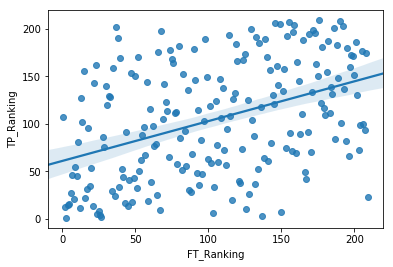

In [77]:
sns.regplot(x='FT_Ranking', y='TP_Ranking' ,data=FT_TP_DF)

In [78]:
FT_TP_DF.corr()

,FT_Ranking,TP_Ranking
FT_Ranking,1.000000,0.419871
TP_Ranking,0.419871,1.000000


In [79]:
smf.ols('TP_Ranking ~ FT_Ranking', data=FT_TP_DF).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TP_Ranking   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     44.30
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.48e-10
Time:                        19:02:56   Log-Likelihood:                -1133.2
No. Observations:                 209   AIC:                             2270.
Df Residuals:                     207   BIC:                             2277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.9136      7.639      7.974      0.000      45.853      75.974
FT_Ranking     0.4199      0.063      6.656      0.000       0.296       0.544
==============================================================================
Omnibus:                       31.736   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.405
Skew:                           0.072   Prob(JB):                       0.0150
Kurtosis:                       2.028   Cond. No.                         243.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Section 5: Analyzing Hall of Fame Members by Category

To start, we define the DataFrame as 'hof' and then set up a two different series ('category' and 'count') listed in the file. We then use a for loop to create a dictionary from these two series and then convert that dictionary into a DataFrame.  We then add a new column 'Percentage' to assign proportions by category and then create a pie chart.

In [80]:
hof=pd.read_csv(url_2)
hof.head(1)

,year,hofID,name,category
0,1959,NaN,Amos Alonzo Stagg,Contributor


In [81]:
hof['category'].value_counts().index

Index(['Player', 'Coach', 'Contributor', 'Referee', 'Team'], dtype='object')

In [82]:
hof['category'].value_counts()

Player         157
Coach           90
Contributor     58
Referee         14
Team             9
Name: category, dtype: int64

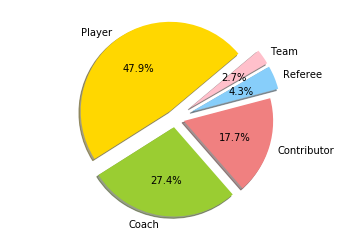

In [83]:
## Creating dictionary in order to sum up number of entries in each category
hof_dict={hof['category'].value_counts().index[0]:hof['category'].value_counts()[0]}
for i in range(1,5):
    hof_dict[hof['category'].value_counts().index[i]]=hof['category'].value_counts()[i]
## Converting dictionary back to a dataframe in order to manipulate and chart
hof_df=pd.DataFrame.from_dict(hof_dict,orient='index')
hof_df=hof_df.rename(columns={0:'Category'})
## Adding percentage column to the dataframe in order to chart it
hof_df['Percentage']=hof_df['Category']/hof_df['Category'].sum()
hof_df_PCT=hof_df[['Percentage']]

labels = 'Player', 'Coach', 'Contributor', 'Referee', 'Team'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
sizes = ([hof_df_PCT['Percentage'][0].round(4),hof_df_PCT['Percentage'][1].round(4),hof_df_PCT['Percentage'][2].round(4),
         hof_df_PCT['Percentage'][3].round(4),hof_df_PCT['Percentage'][4].round(4)])
explode=(0.1,0.1,0.1,0.2,0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=40)
plt.axis('equal')
plt.show()

Here, we see that players constitute the highest percentage among the groups represented in the hall of fame, with 47.9%, followed by Coaches, then Contributors, Referees, and Teams.

### Conclusion

While our process of selecting various criteria to determine maximum player efficiency was a subjective one, it yielded a collection of players whose names have household resonance: Michael Jordan, LeBron James, Kobe Bryant, Kevin Durant, and our eventual victor, Larry Bird. This suggests that our process had at least some credibility. Similarly, we were able to provide some justification for the claim that players with earlier draft picks are higher point scorers; with further investigation and pages allowed, we might be able to perform similar tests using outher metrics, like rebounds, three pointers, etc. It is relatively apparent, however, that the game's various skills and performance metrics have some reasonable linkage. Overall, while we were able to reach some logical and expected conclusions about basketball based on our organization and interpretation of the data, the debate regarding who constitutes the best player of all time (and why) will likely rage on among basketball's most spirited and loyal fans.